## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

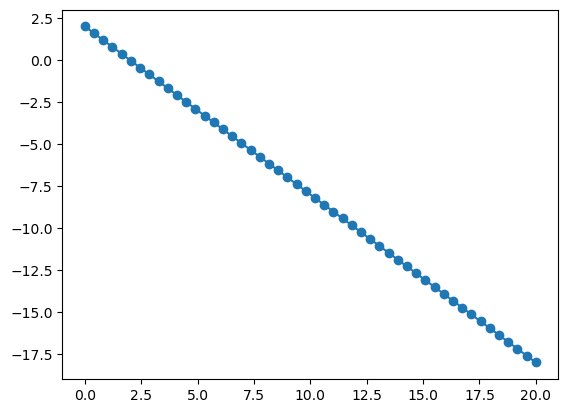

In [4]:
plt.plot(X,y,marker = 'o')

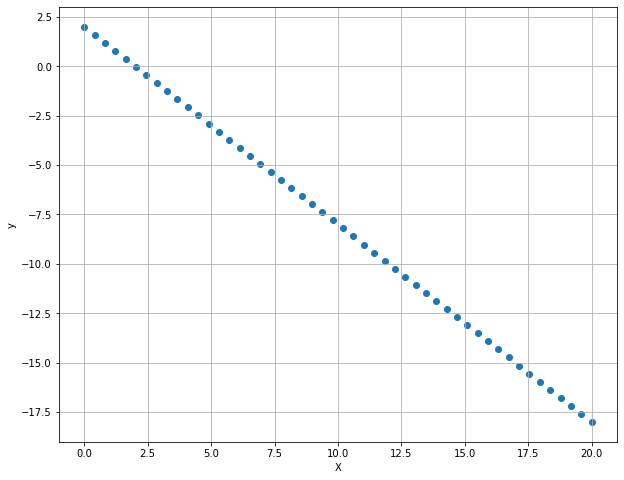

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [6]:
def Batch_GD(X, y, alpha, epochs):
    
    m = len(X) 
    all_loss, all_theta0, all_theta1 = [], [], []
    theta0, theta1 = 0, 0
    plot = plt.scatter(X, y, s=45,color='red')
    
    for i in range(epochs):
        y_hat  = theta0 + theta1 * X
        print(f"****************** Iteration {i} ********************\n ")
        print(f"\n h(x):{y_hat}")

        loss = sum( np.square(y_hat - y) ) / (2*m)
        
        # Add previous thetas and loss 
        all_loss.append(loss)
        all_theta0.append(theta0)
        all_theta1.append(theta1)
        
        # Gradient thetas
        g_theta0 = sum(y_hat - y) / m
        g_theta1 = sum((y_hat - y) * X) / m
        
        
        # Stopping using gradient
        if np.linalg.norm([g_theta0, g_theta1]) < 0.001:
            break
        
        # Stopping using loss
        if (i > 0) and abs(all_loss[i-1] - all_loss[i]) < 0.001:
            break

        # Update thetas
        theta0 = theta0 - (alpha * g_theta0)
        theta1 = theta1 - (alpha * g_theta1)  
        
        plot = plt.plot(X, y_hat, alpha=0.5)
        plt.title('X - Y - Line Predicted on every iteration')
        plt.xlabel('X')
        plt.ylabel('y')
        
    
    
    print(f"After {i+1} Iterations\n")
    print(f"Theta0: {theta0}")
    print(f"Theta1: {theta1}")
    print(f"loss: {loss}\n")
    print(f"Y_Hat: \n{y_hat}\n")
    print(f"Y: \n{y}")
    
    return (all_theta0, all_theta1, all_loss, y_hat, loss, theta0, theta1, i)

# all_theta0, all_theta1, all_loss, y_hat, loss,theta0, theta1, num_iterations \
# = Batch_GD(X,y, 0.001, 250)

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

****************** Iteration 0 ********************
 

 h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
****************** Iteration 1 ********************
 

 h(x):[-0.004      -0.02740691 -0.05081383 -0.07422074 -0.09762766 -0.12103457
 -0.14444148 -0.1678484  -0.19125531 -0.21466222 -0.23806914 -0.26147605
 -0.28488297 -0.30828988 -0.33169679 -0.35510371 -0.37851062 -0.40191753
 -0.42532445 -0.44873136 -0.47213828 -0.49554519 -0.5189521  -0.54235902
 -0.56576593 -0.58917284 -0.61257976 -0.63598667 -0.65939359 -0.6828005
 -0.70620741 -0.72961433 -0.75302124 -0.77642815 -0.79983507 -0.82324198
 -0.8466489  -0.87005581 -0.89346272 -0.91686964 -0.94027655 -0.96368347
 -0.98709038 -1.01049729 -1.03390421 -1.05731112 -1.08071803 -1.10412495
 -1.12753186 -1.15093878]
****************** Iteration 2 ********************
 

 h(x):[-0.00771127 -0.05294055 -0.09816983 -0.14339911 -0.18

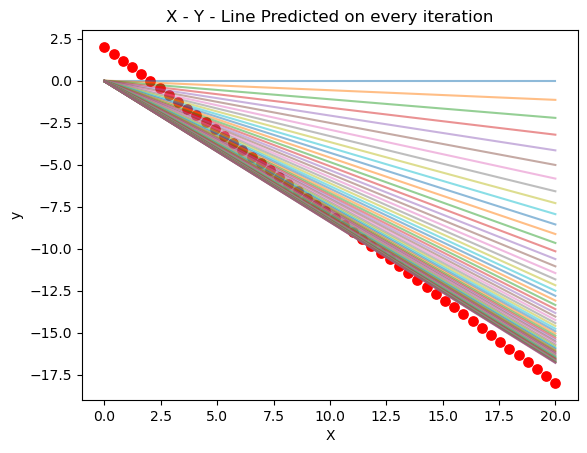

In [7]:
all_theta0, all_theta1, all_loss, y_hat, loss,theta0, theta1, num_iterations \
= Batch_GD(X,y, 0.0005, 300)

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [8]:
from sklearn.metrics import r2_score

In [9]:
r2_score(y,y_hat)

0.9686158031920962

r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [10]:
def loss_plot(all_loss):
    plt.plot(all_loss, marker='o',color='m')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Epochs - Loss')
    plt.show()

In [37]:
def theta0_plot(theta,all_loss):
    plt.plot(theta,all_loss,marker='o',color='m')
    plt.title('Learning rate= 0.0005')
    plt.xlabel('Theta0')
    plt.ylabel('Loss')
    plt.show()
    
    

In [38]:
def theta1_plot(theta,all_loss):
    plt.plot(theta,all_loss,marker='o',color='m')
    plt.title('Learning rate= 0.0005')
    plt.xlabel('Theta1')
    plt.ylabel('Loss')
    plt.show()

In [16]:
def hypothes_plot(all_theta_0,all_theta_1,X,y):
    plt.scatter(X,y)
    for i in range (len(y)):
        y_hat =all_theta0[i] +all_theta_1[i]*X
        
        plt.plot(X,y_hat,color='red')
    

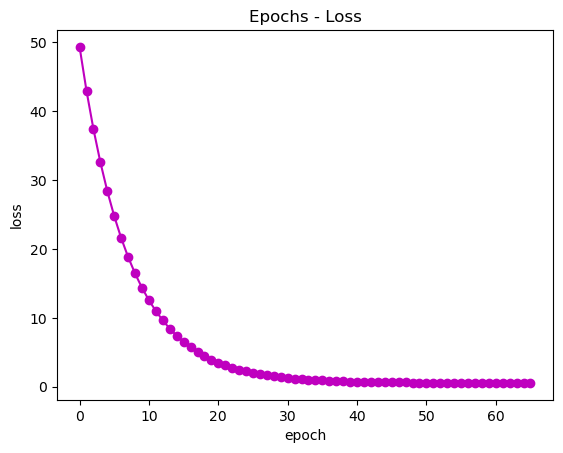

In [12]:
loss_plot(all_loss)


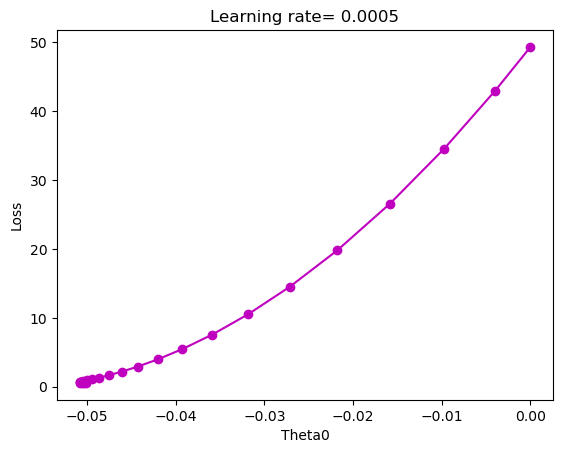

In [39]:
theta0_plot(all_theta0,all_loss)


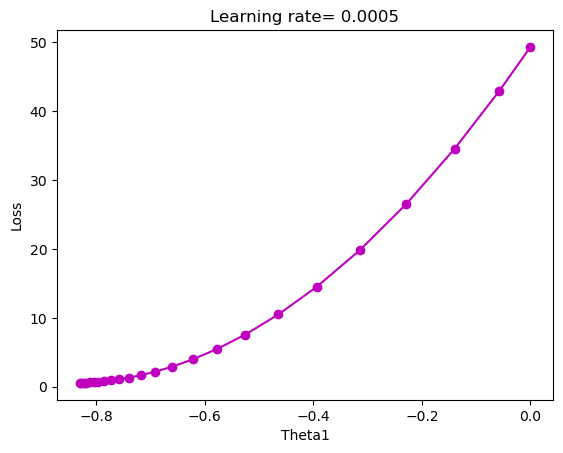

In [40]:
theta1_plot(all_theta1,all_loss)

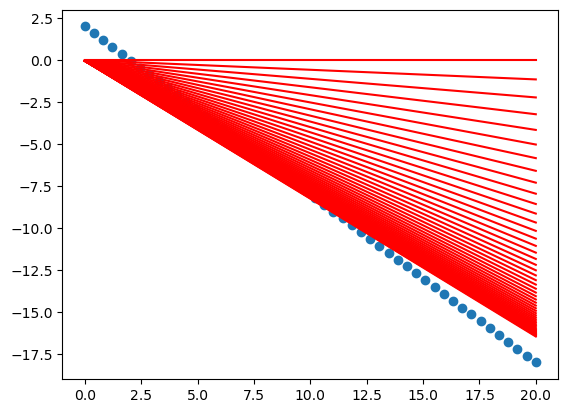

In [17]:
hypothes_plot(all_theta0,all_theta1,X,y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


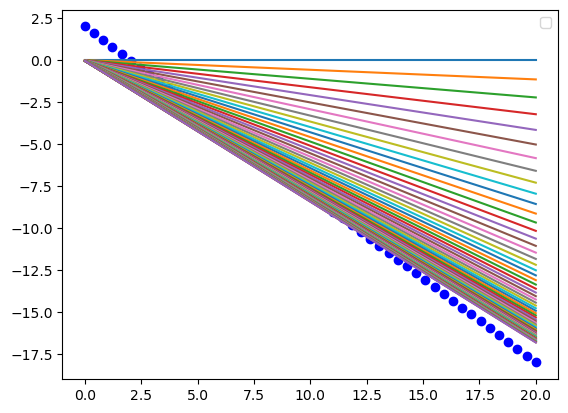

In [70]:
# ploting_all(X, y, alpha=0.0005, gamma=0.6, epoches=300)

In [24]:
def best_plot(y_hat,X,y):
    plt.scatter(X,y)
    plt.plot(X, y_hat, color='r')
    plt.title('X - Y - Line Predicted')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

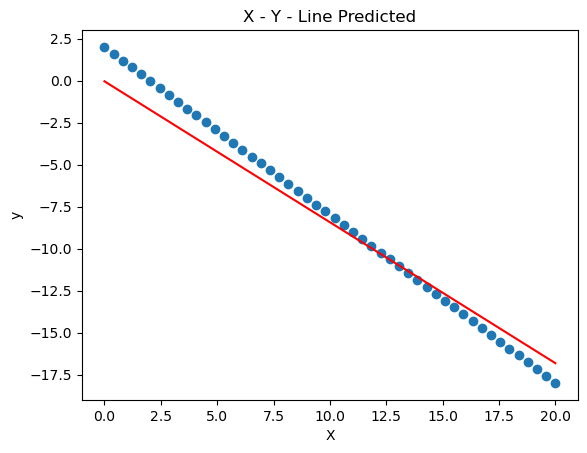

In [25]:
best_plot(y_hat,X,y)

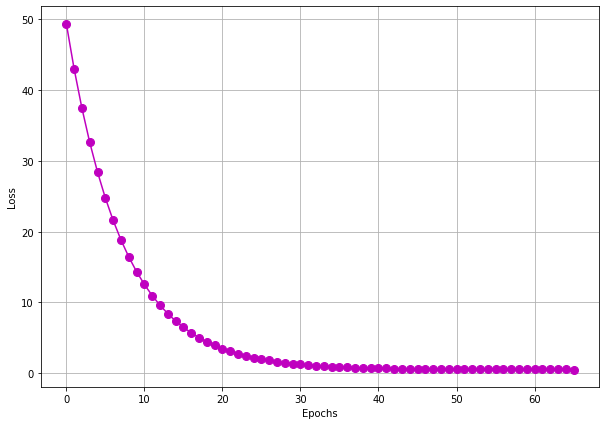

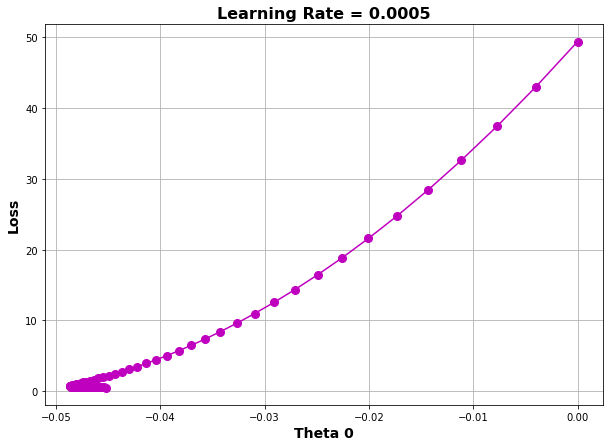

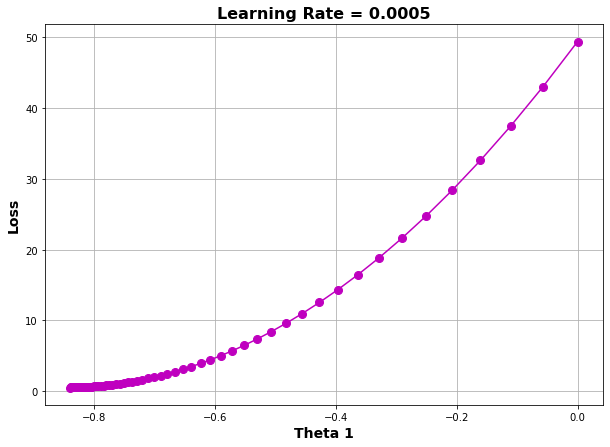

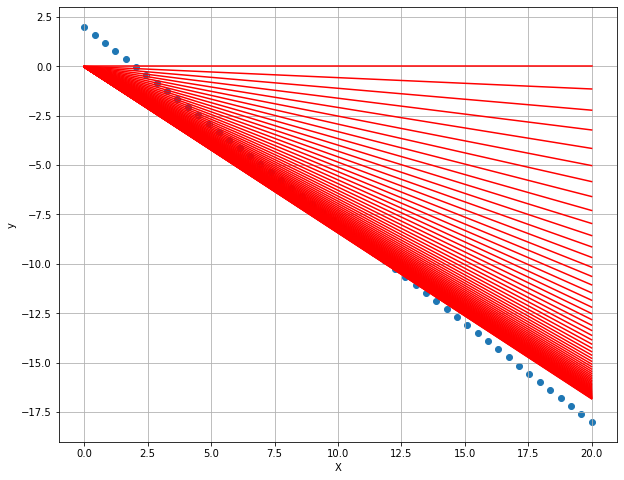

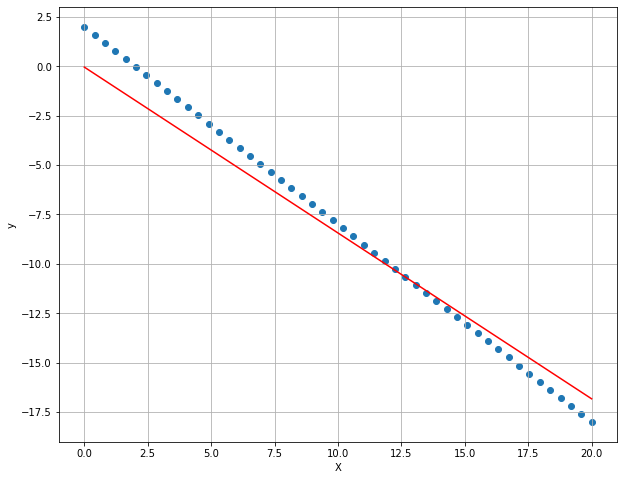

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [79]:
def Momentum(X, y, alpha, gamma, epochs):
    m = len(X) 
    all_loss ,all_theta0,all_theta1= [],[],[]
    theta0, theta1 = 0, 0
    v_updated_theta0 = 0
    v_updated_theta1 = 0
    hypothesis_history=[]

    for i in range(epochs):
        y_hat  = theta0 + theta1 * X
        hypothesis_history.append(y_hat)
        print(f"****************** Iteration {i} ********************\n ")
        print(f"\n h(x):{y_hat}")

        loss = sum( np.square(y_hat - y) ) /(2*m)

        # Add previous thetas and loss 
        all_loss.append(loss)
        all_theta0.append(theta0)
        all_theta1.append(theta1)
        
        # Gradient thetas
        g_theta0 = sum(y_hat - y) / m
        g_theta1 = sum((y_hat - y) * X) / m

        # Stopping using gradient
        if np.linalg.norm([g_theta0, g_theta1]) < 0.001:
            break
             # Stopping using loss
        if (i > 0) and abs(all_loss[i-1] - all_loss[i]) < 0.001:
            break
            
            
       # used updated thetas to learn from the history 
        v_updated_theta0 = gamma * v_updated_theta0 + (alpha * g_theta0)
        v_updated_theta1 = gamma * v_updated_theta1 + (alpha * g_theta1) 

        # Update thetas using the updated version of them
        theta0 = theta0 - v_updated_theta0
        theta1 = theta1 - v_updated_theta1
        
     
        
    print("\n******* Training Report *******")
    print(f"Gradent descent after   {i+1} Iterations\n")
    print(f"theta_0_opt: {theta0}")
    print(f"theta_1_opt: {theta1}")
    print(f"cost: {loss}\n")
    print(f"Y_Hat: \n{y_hat}\n")
    print(f"Y: \n{y}")

    return (all_loss, y_hat, loss,theta0,theta1,all_theta0,all_theta1, i,hypothesis_history)


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [69]:
all_loss, y_hat, loss,theta0,theta1,all_theta0,all_theta1, i,hypothesis_history \
= Momentum(X,y, 0.0005, 0.5, 300)

****************** Iteration 0 ********************
 

 h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
****************** Iteration 1 ********************
 

 h(x):[-0.004      -0.02740691 -0.05081383 -0.07422074 -0.09762766 -0.12103457
 -0.14444148 -0.1678484  -0.19125531 -0.21466222 -0.23806914 -0.26147605
 -0.28488297 -0.30828988 -0.33169679 -0.35510371 -0.37851062 -0.40191753
 -0.42532445 -0.44873136 -0.47213828 -0.49554519 -0.5189521  -0.54235902
 -0.56576593 -0.58917284 -0.61257976 -0.63598667 -0.65939359 -0.6828005
 -0.70620741 -0.72961433 -0.75302124 -0.77642815 -0.79983507 -0.82324198
 -0.8466489  -0.87005581 -0.89346272 -0.91686964 -0.94027655 -0.96368347
 -0.98709038 -1.01049729 -1.03390421 -1.05731112 -1.08071803 -1.10412495
 -1.12753186 -1.15093878]
****************** Iteration 2 ********************
 

 h(x):[-0.00971127 -0.066644   -0.12357674 -0.18050948 -0.23

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [70]:
r2_score(y,y_hat)

0.9676613194676997

r2_score: 0.9687892837396442


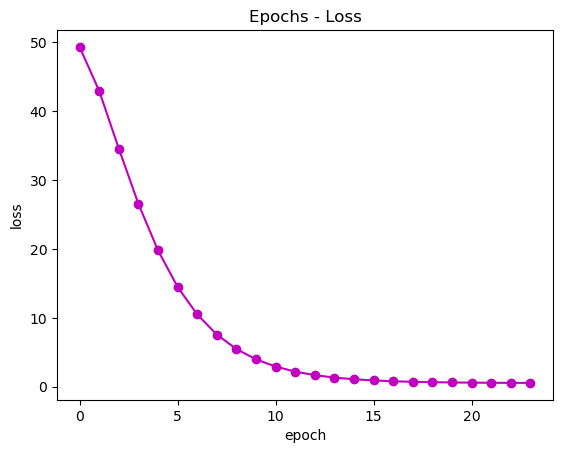

In [71]:
loss_plot(all_loss)

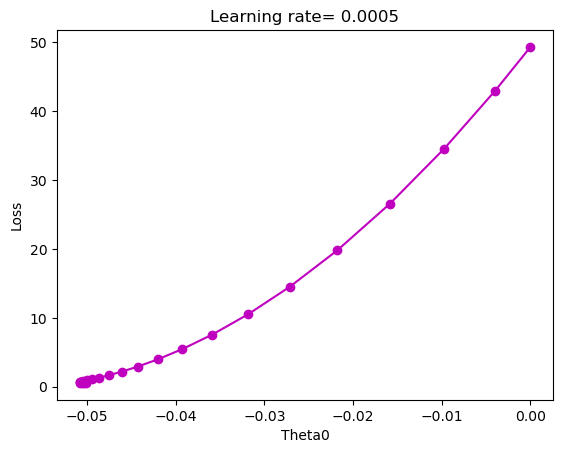

In [72]:
theta0_plot(all_theta0,all_loss)


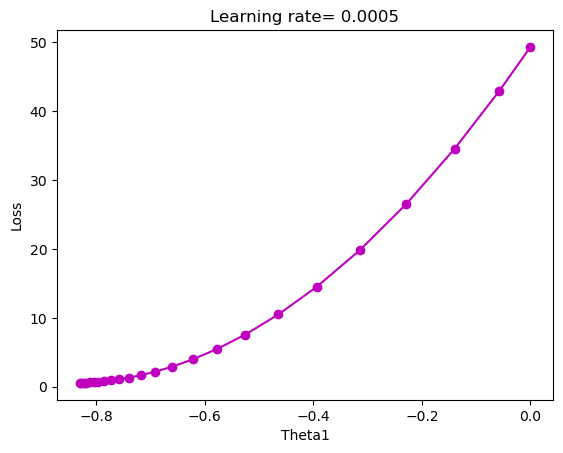

In [73]:
theta1_plot(all_theta1,all_loss)

24

In [74]:
def hypothes_plot(H,x,y):
    plt.scatter(x,y)
    for i in H:
        plt.plot(x,i, color='red')
    plt.show()

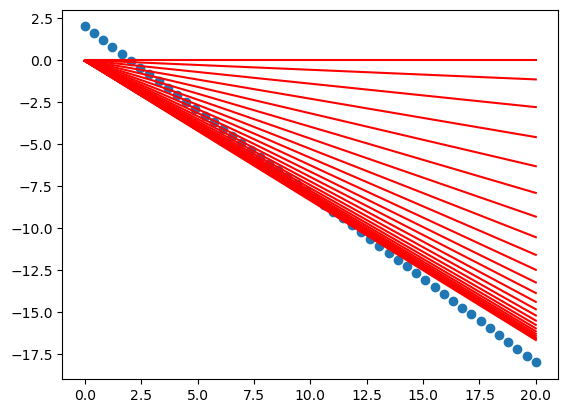

In [76]:
hypothes_plot(hypothesis_history,X,y)

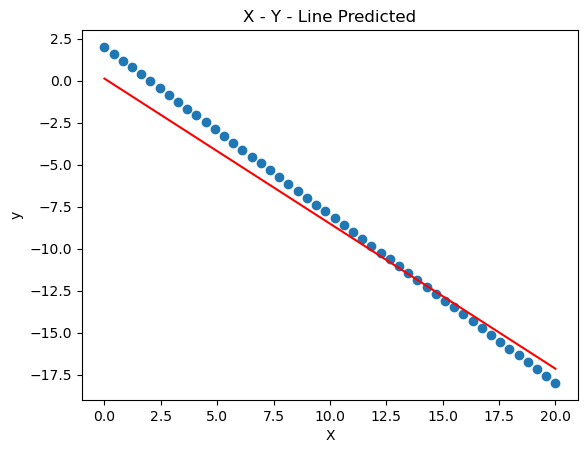

In [89]:

best_plot(y_hat,X,y)


#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [80]:
all_loss, y_hat, loss,theta0,theta1,all_theta0,all_theta1, i,hypothesis_history \
= Momentum(X,y, 0.0005, 0.9, 300)

****************** Iteration 0 ********************
 

 h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
****************** Iteration 1 ********************
 

 h(x):[-0.004      -0.02740691 -0.05081383 -0.07422074 -0.09762766 -0.12103457
 -0.14444148 -0.1678484  -0.19125531 -0.21466222 -0.23806914 -0.26147605
 -0.28488297 -0.30828988 -0.33169679 -0.35510371 -0.37851062 -0.40191753
 -0.42532445 -0.44873136 -0.47213828 -0.49554519 -0.5189521  -0.54235902
 -0.56576593 -0.58917284 -0.61257976 -0.63598667 -0.65939359 -0.6828005
 -0.70620741 -0.72961433 -0.75302124 -0.77642815 -0.79983507 -0.82324198
 -0.8466489  -0.87005581 -0.89346272 -0.91686964 -0.94027655 -0.96368347
 -0.98709038 -1.01049729 -1.03390421 -1.05731112 -1.08071803 -1.10412495
 -1.12753186 -1.15093878]
****************** Iteration 2 ********************
 

 h(x):[-0.01131127 -0.07760677 -0.14390227 -0.21019777 -0.27

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [81]:
r2_score(y,y_hat)

0.973589591111118

r2_score 0.973589591111118


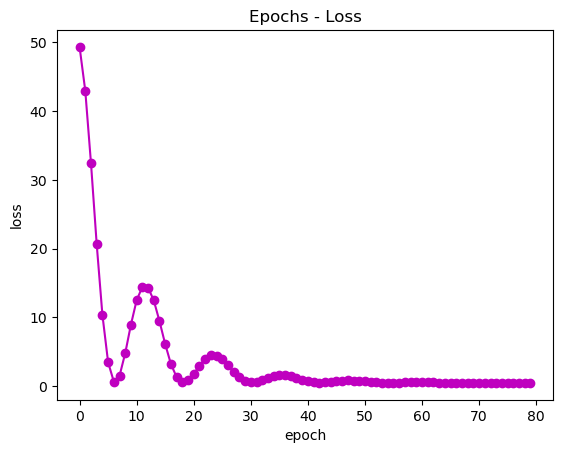

In [83]:
loss_plot(all_loss)

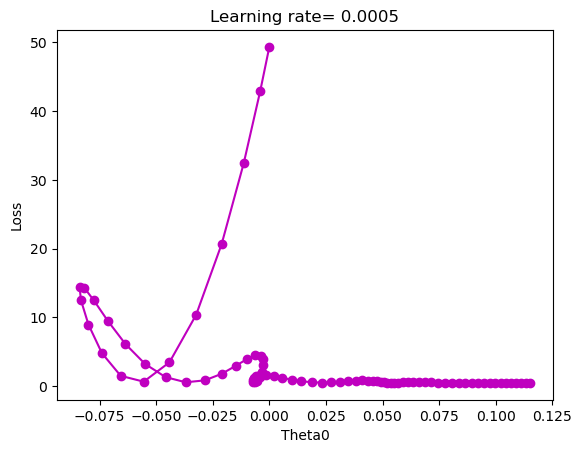

In [84]:
theta0_plot(all_theta0,all_loss)

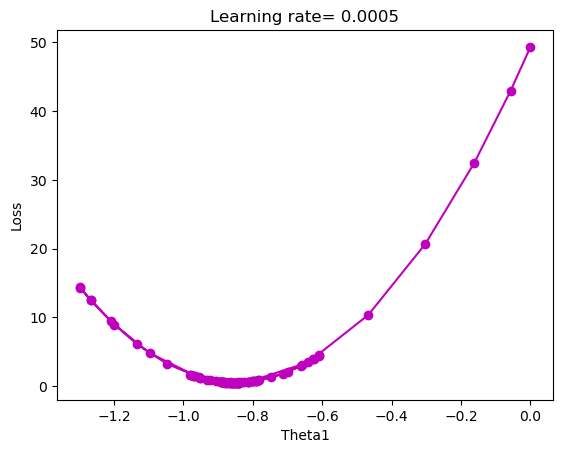

In [85]:
theta1_plot(all_theta1,all_loss)


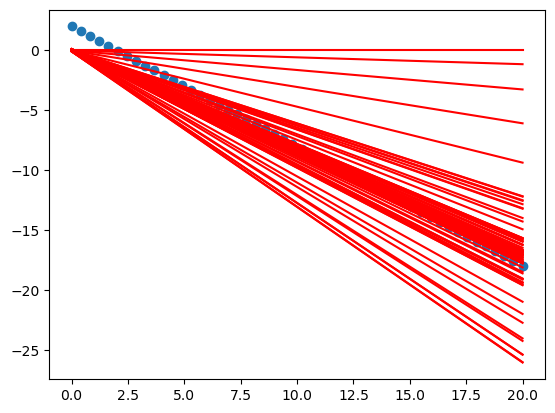

In [86]:
hypothes_plot(hypothesis_history,X,y)

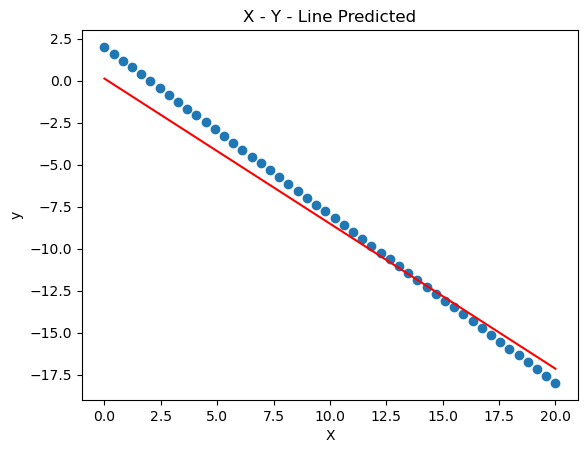

In [88]:
best_plot(y_hat,X,y)

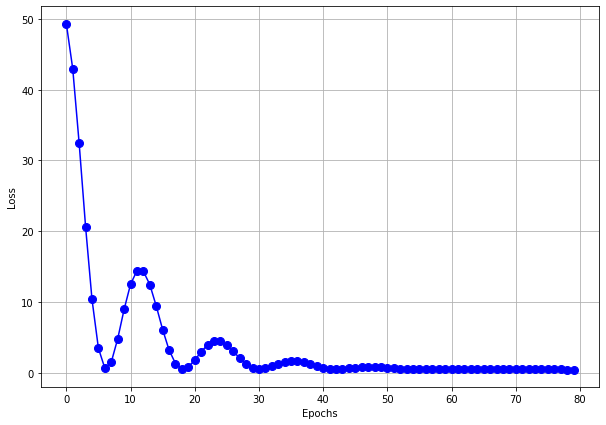

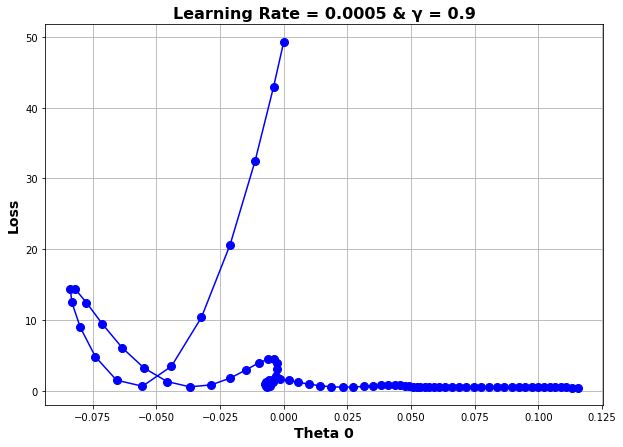

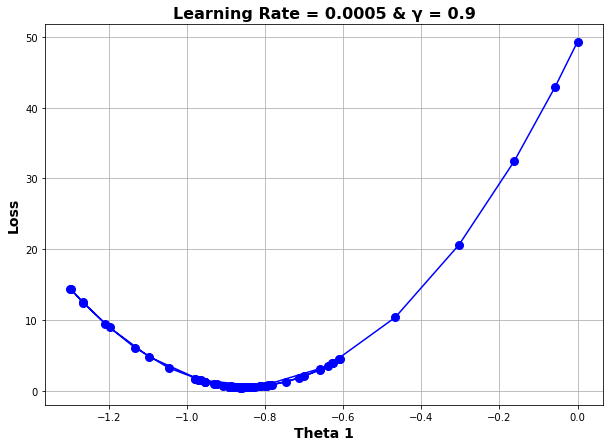

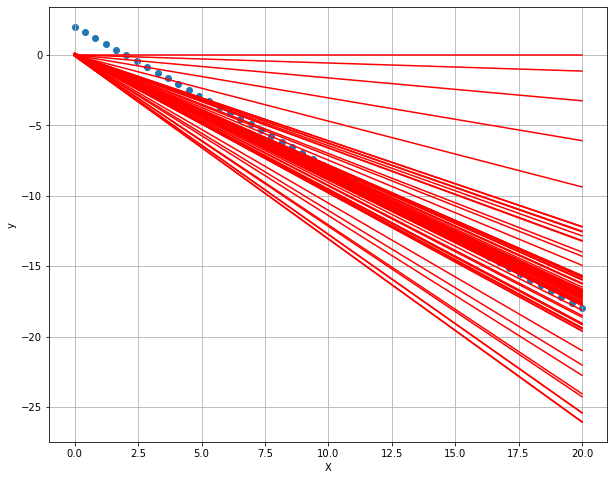

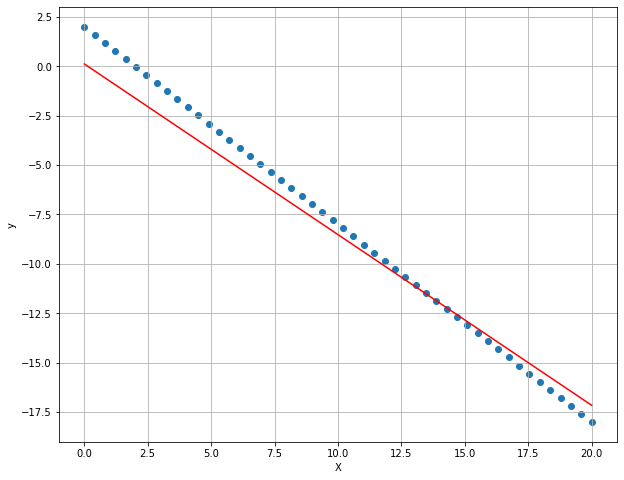

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [90]:
all_loss, y_hat, loss,theta0,theta1,all_theta0,all_theta1, i,hypothesis_history \
= Momentum(X,y, 0.0005, 0.89, 300)

****************** Iteration 0 ********************
 

 h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
****************** Iteration 1 ********************
 

 h(x):[-0.004      -0.02740691 -0.05081383 -0.07422074 -0.09762766 -0.12103457
 -0.14444148 -0.1678484  -0.19125531 -0.21466222 -0.23806914 -0.26147605
 -0.28488297 -0.30828988 -0.33169679 -0.35510371 -0.37851062 -0.40191753
 -0.42532445 -0.44873136 -0.47213828 -0.49554519 -0.5189521  -0.54235902
 -0.56576593 -0.58917284 -0.61257976 -0.63598667 -0.65939359 -0.6828005
 -0.70620741 -0.72961433 -0.75302124 -0.77642815 -0.79983507 -0.82324198
 -0.8466489  -0.87005581 -0.89346272 -0.91686964 -0.94027655 -0.96368347
 -0.98709038 -1.01049729 -1.03390421 -1.05731112 -1.08071803 -1.10412495
 -1.12753186 -1.15093878]
****************** Iteration 2 ********************
 

 h(x):[-0.01127127 -0.0773327  -0.14339413 -0.20945557 -0.27

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [91]:
r2_score(y,y_hat)

0.972435565060376

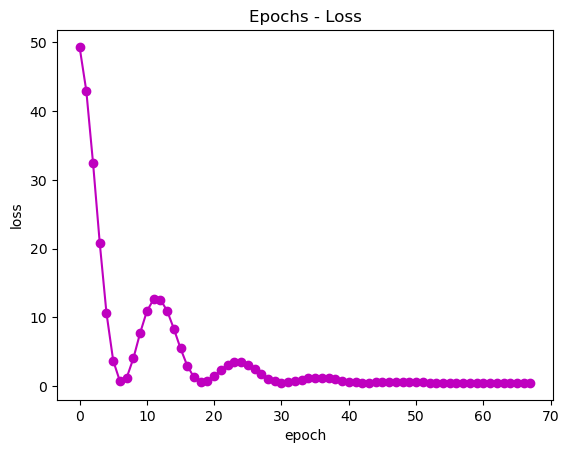

In [92]:
loss_plot(all_loss)

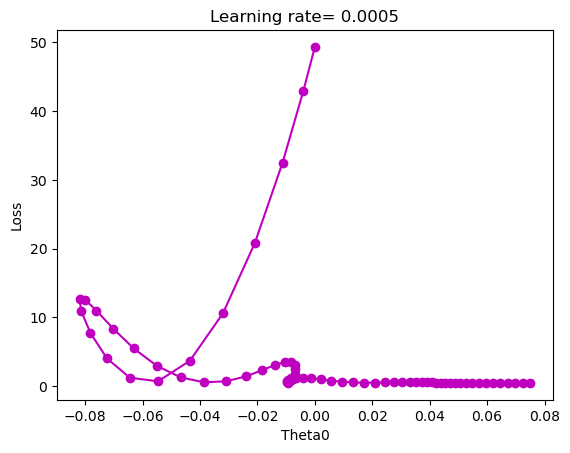

In [93]:
theta0_plot(all_theta0,all_loss)

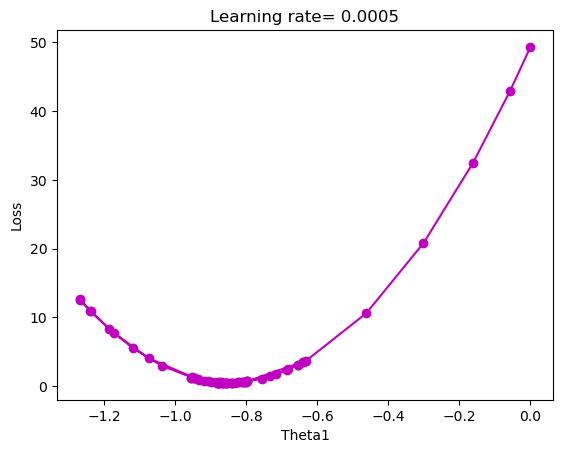

In [94]:
theta1_plot(all_theta1,all_loss)

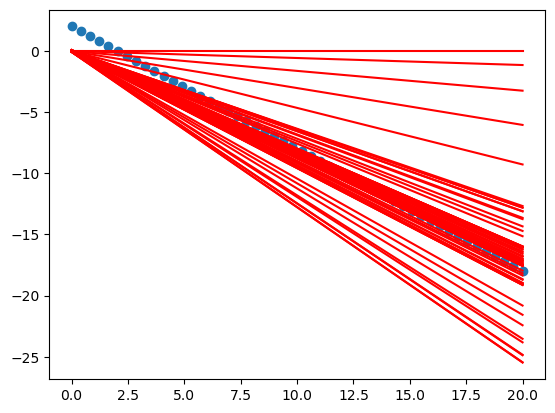

In [95]:
hypothes_plot(hypothesis_history,X,y)

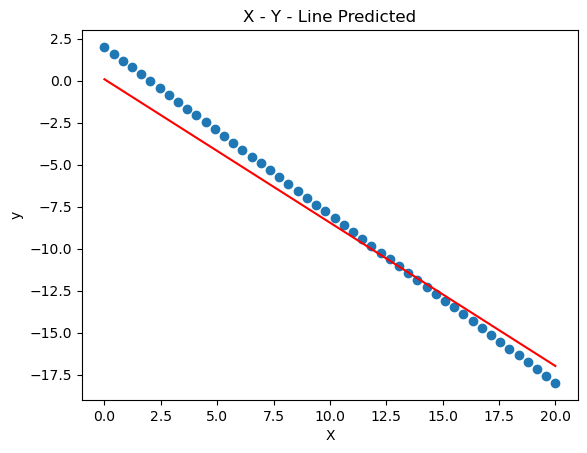

In [96]:
best_plot(y_hat,X,y)

r2 score =  0.972435565060376


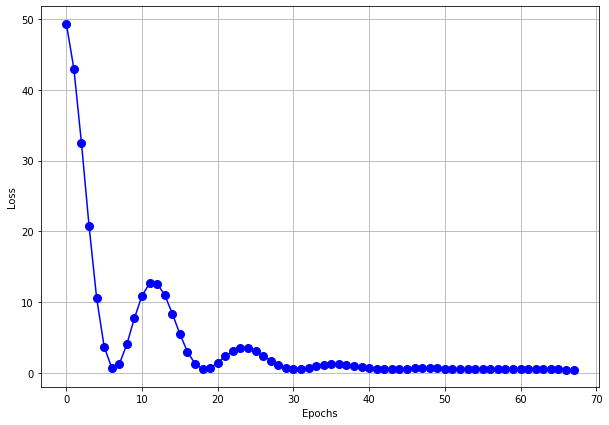

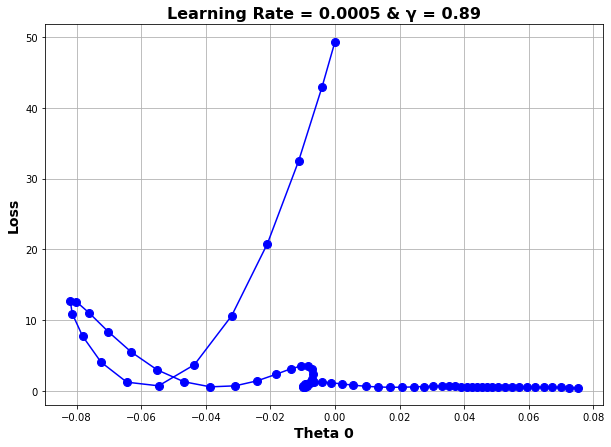

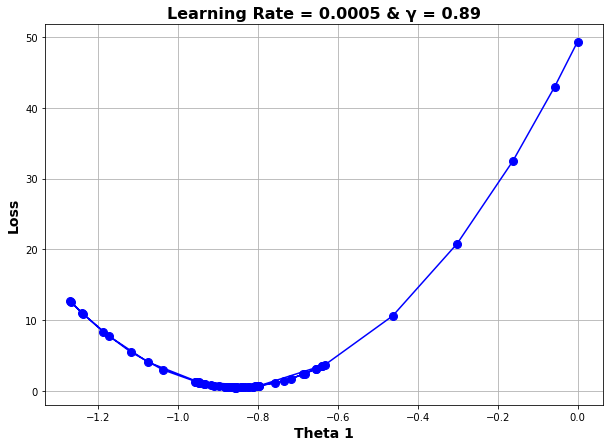

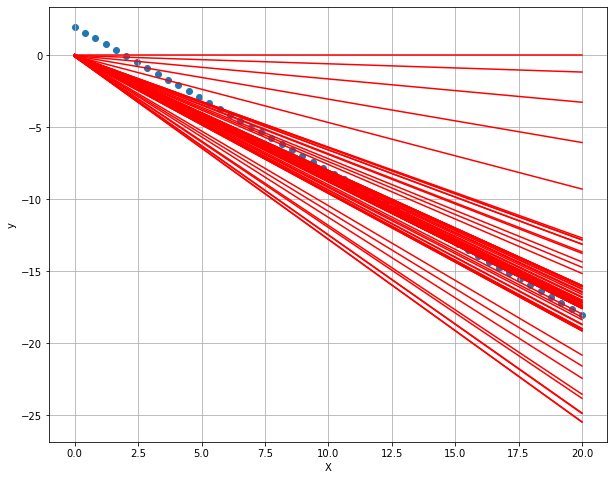

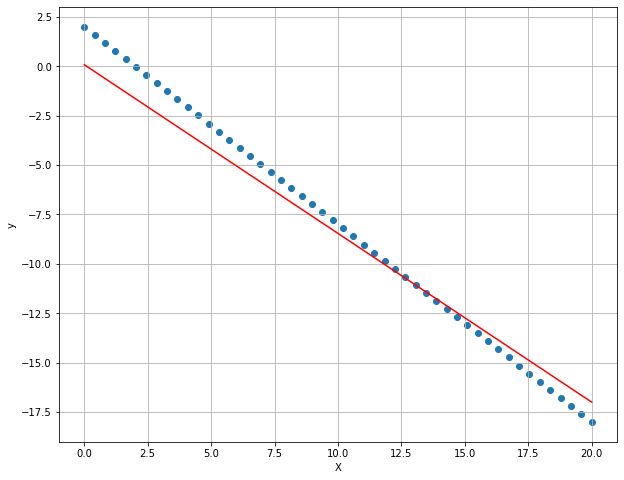

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [97]:
def NAG(x, y, alpha, max_iters, gamma):
    m = len(y)
    convergence_threshold = 0.001
    theta_0 = 0
    theta_1 = 0
    theta_0_history = []
    theta_1_history = []
    loss = []
    hypothesis_history = []
    v_theta_0 = 0
    v_theta_1 = 0

    for i in range(max_iters + 1):
        print("****************** Iteration ", i, "********************")
        # Step 2
        y_pred = theta_0 + theta_1 * x
        hypothesis_history.append(y_pred)
        error_vector = y_pred - y
        print("h(x):", y_pred)

        # Step 3
        error = y_pred - y
        mse = np.sum(error ** 2) / (2 * m)
        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        loss.append(mse)
        print("j=", mse)

        # Step 4
        gradient_theta_0 = (1 / m) * np.sum(error_vector)
        gradient_theta_1 = (1 / m) * np.dot(error_vector, x)
        gradient_vector = np.array([gradient_theta_0, gradient_theta_1])
        print("gradient_vector:", gradient_vector)

        gradient_norm = np.linalg.norm(gradient_vector)
        print("gradient_norm:", gradient_norm)

        if gradient_norm < convergence_threshold:  # gradient check
            print("Converged!")
            break
        if (i > 0) and (abs(loss[-1] - loss[-2])) < 0.001:  # cost check
            break

        theta0_temp = theta_0 - gamma * v_theta_0
        theta1_temp = theta_1 - gamma * v_theta_1

        y_pred_temp = theta0_temp + theta1_temp * x
        error_temp = y_pred_temp - y

        g_theta0_temp = (1 / m) * np.sum(error_temp)
        g_theta1_temp = (1 / m) * np.dot(error_temp, x)
        


        
        v_theta_0 = gamma * v_theta_0 + alpha * g_theta0_temp
        v_theta_1 = gamma * v_theta_1 + alpha * g_theta1_temp
        
        theta_0=theta0_temp - alpha *g_theta0_temp
        theta_1=theta1_temp - alpha *g_theta1_temp



        print("theta_0_new:", theta_0)
        print("theta_1_new:", theta_1)

    return {
        'theta_0_history': theta_0_history,
        'theta_1_history': theta_1_history,
        'loss': loss,
        'hypothesis_history': hypothesis_history,
        'optimal_theta_0': theta_0,
        'optimal_theta_1': theta_1
    }

In [99]:
Nag_test=NAG(X, y, .0005, 300, .9)

****************** Iteration  0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
j= 49.34693877551021
gradient_vector: [  8.         114.69387755]
gradient_norm: 114.97254258164628
theta_0_new: -0.004
theta_1_new: -0.05734693877551021
****************** Iteration  1 ********************
h(x): [-0.004      -0.02740691 -0.05081383 -0.07422074 -0.09762766 -0.12103457
 -0.14444148 -0.1678484  -0.19125531 -0.21466222 -0.23806914 -0.26147605
 -0.28488297 -0.30828988 -0.33169679 -0.35510371 -0.37851062 -0.40191753
 -0.42532445 -0.44873136 -0.47213828 -0.49554519 -0.5189521  -0.54235902
 -0.56576593 -0.58917284 -0.61257976 -0.63598667 -0.65939359 -0.6828005
 -0.70620741 -0.72961433 -0.75302124 -0.77642815 -0.79983507 -0.82324198
 -0.8466489  -0.87005581 -0.89346272 -0.91686964 -0.94027655 -0.96368347
 -0.98709038 -1.01049729 -1.03390421 -1.05731112 -1.08071803 -1.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [101]:
y_predict=test['optimal_theta_0']+test['optimal_theta_1']*X
r2_score(y,y_predict)

0.971103130756324

r2_score 0.971103130756324


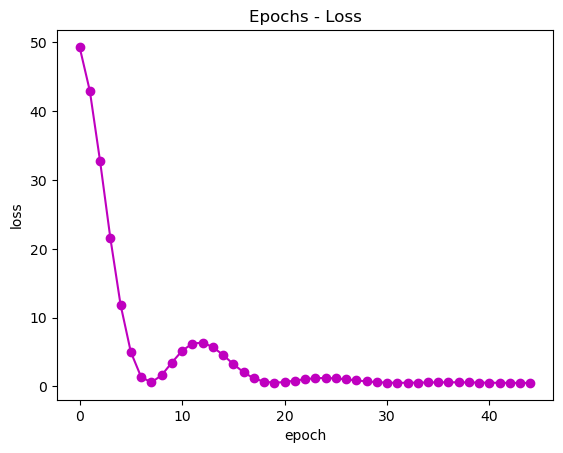

In [104]:
loss_plot(test['loss'])

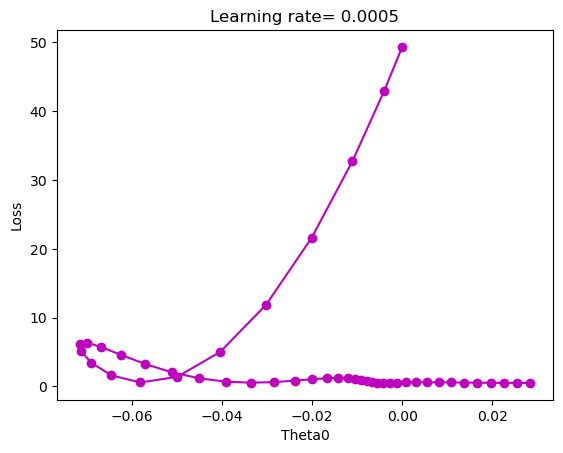

In [105]:
theta_plot(test['theta_0_history'],test['loss'])

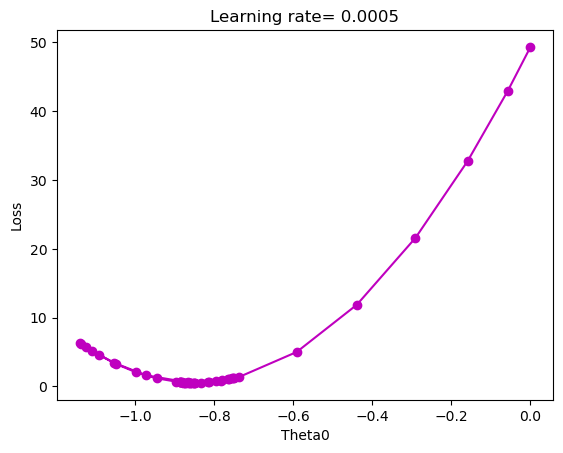

In [106]:
theta_plot(test['theta_1_history'],test['loss'])

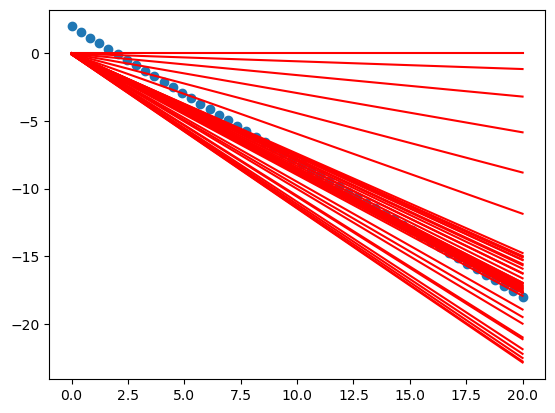

In [107]:
hypothes_plot(test['hypothesis_history'],X,y)

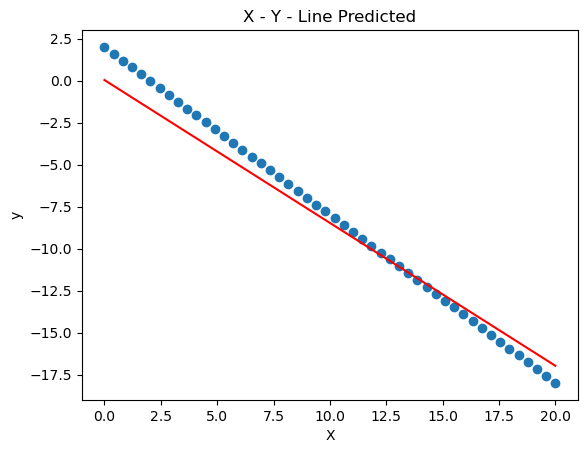

In [108]:
best_plot(y_predict,X,y)

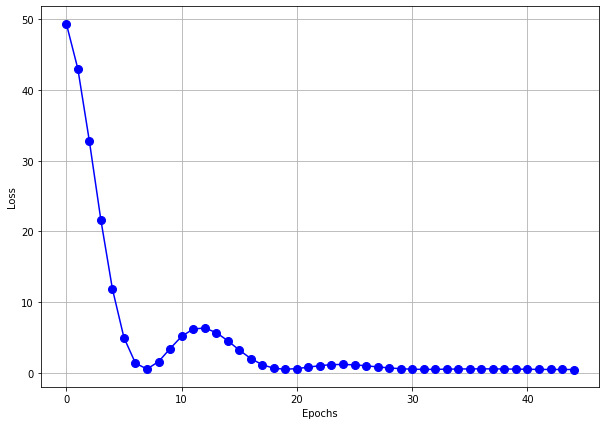

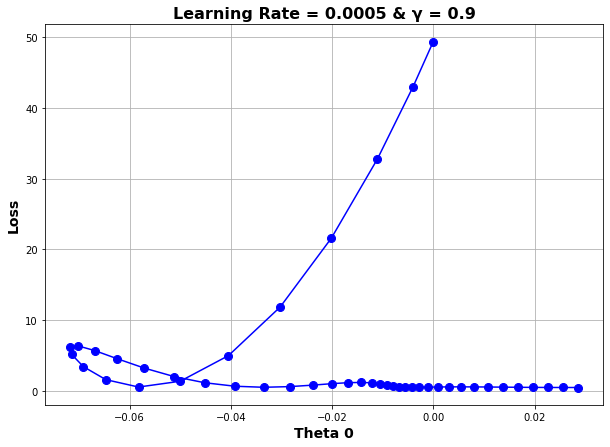

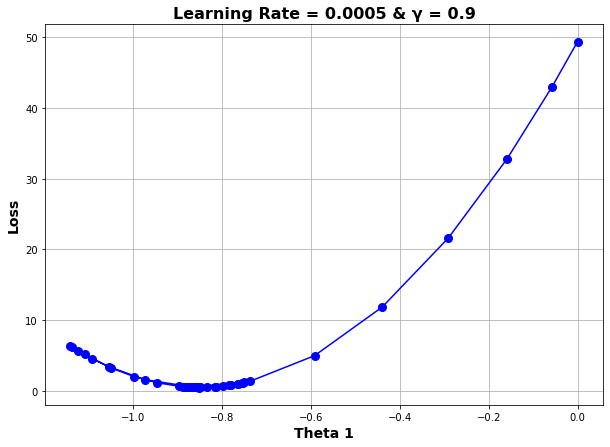

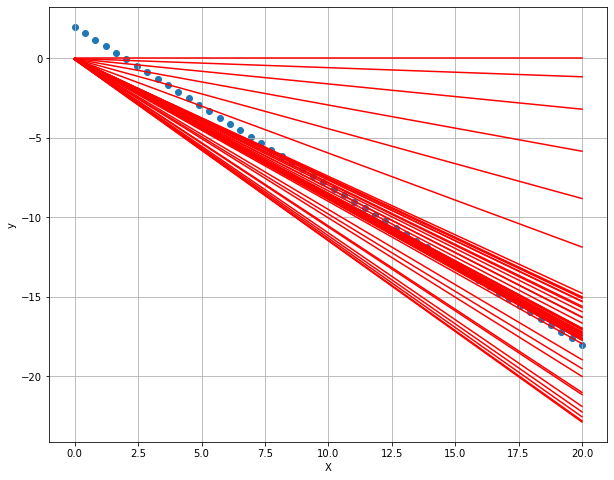

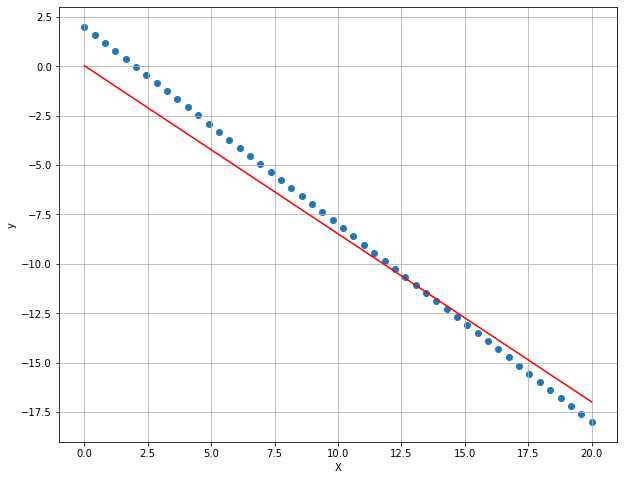

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [109]:
nag_test=NAG(X, y, .0005, 300, .89)

****************** Iteration  0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
j= 49.34693877551021
gradient_vector: [  8.         114.69387755]
gradient_norm: 114.97254258164628
theta_0_new: -0.004
theta_1_new: -0.05734693877551021
****************** Iteration  1 ********************
h(x): [-0.004      -0.02740691 -0.05081383 -0.07422074 -0.09762766 -0.12103457
 -0.14444148 -0.1678484  -0.19125531 -0.21466222 -0.23806914 -0.26147605
 -0.28488297 -0.30828988 -0.33169679 -0.35510371 -0.37851062 -0.40191753
 -0.42532445 -0.44873136 -0.47213828 -0.49554519 -0.5189521  -0.54235902
 -0.56576593 -0.58917284 -0.61257976 -0.63598667 -0.65939359 -0.6828005
 -0.70620741 -0.72961433 -0.75302124 -0.77642815 -0.79983507 -0.82324198
 -0.8466489  -0.87005581 -0.89346272 -0.91686964 -0.94027655 -0.96368347
 -0.98709038 -1.01049729 -1.03390421 -1.05731112 -1.08071803 -1.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [111]:

r2_score(y,y_predict)

0.971103130756324

r2 score =  0.9699718983158406


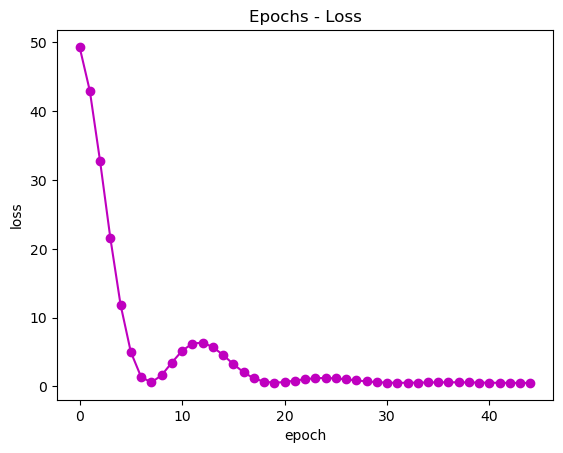

In [112]:
loss_plot(test['loss'])

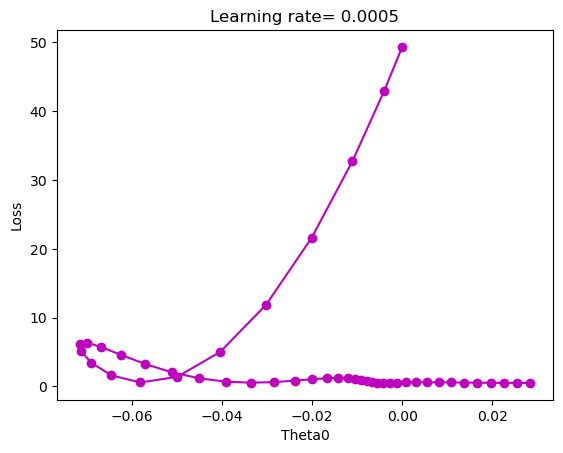

In [113]:
theta_plot(test['theta_0_history'],test['loss'])

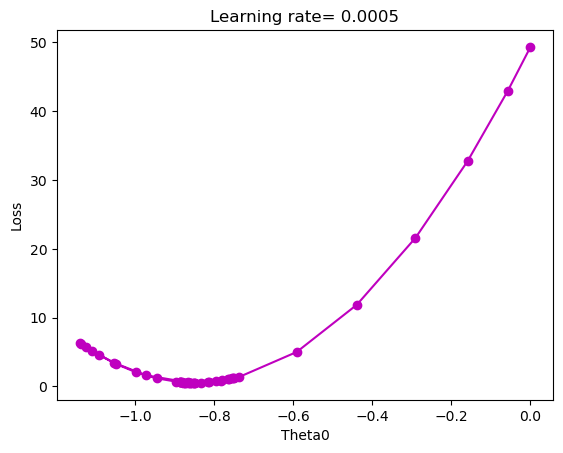

In [114]:
theta_plot(test['theta_1_history'],test['loss'])

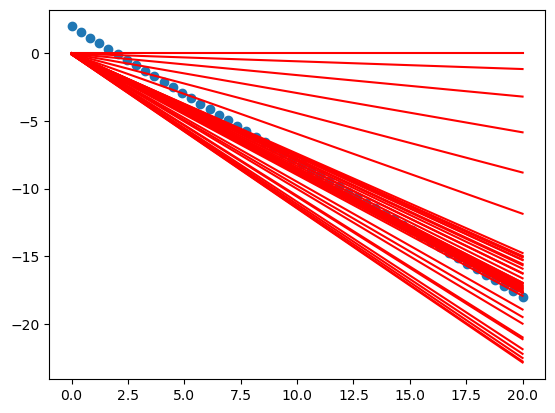

In [115]:
hypothes_plot(test['hypothesis_history'],X,y)

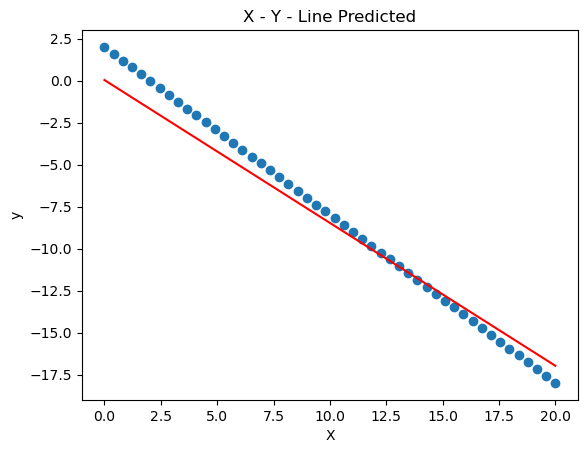

In [116]:
best_plot(y_predict,X,y)

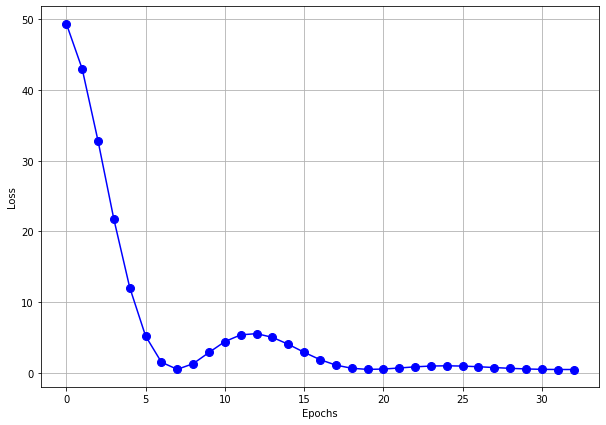

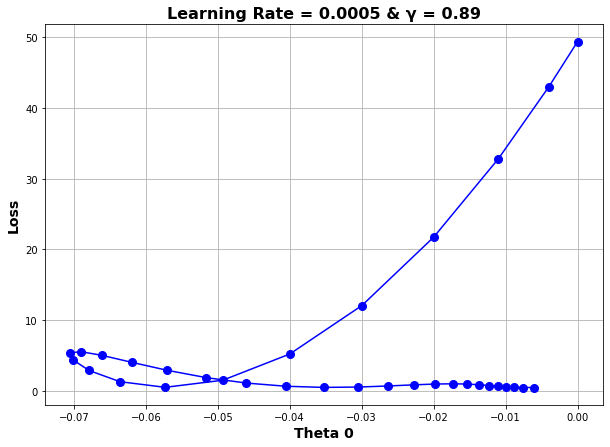

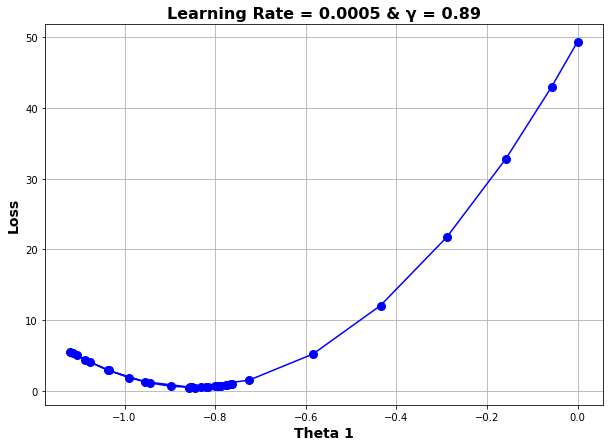

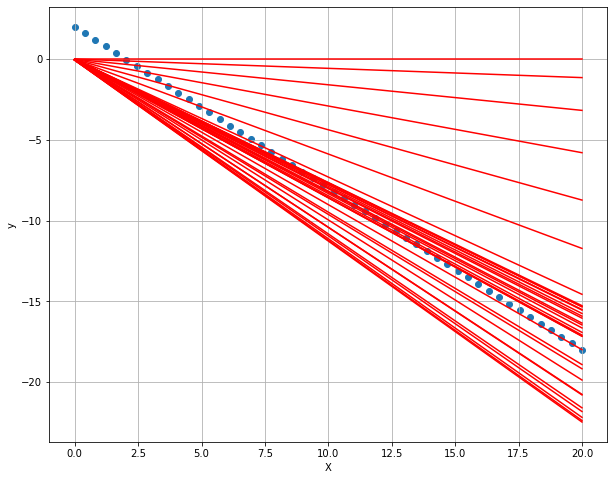

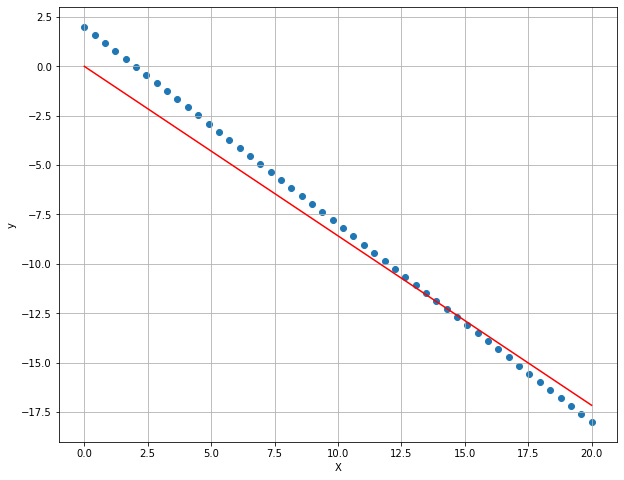